# Classification

## Blocks

In [14]:
import geopandas as gpd

blocks = gpd.read_parquet('./../../tests/data/_blocks.parquet')[['geometry']]
blocks.head()

,geometry
0,"POLYGON ((550762.29 6565038.844, 550768.857 65..."
1,"POLYGON ((550768.857 6565033.563, 550762.29 65..."
2,"POLYGON ((544937.479 6564706.592, 544935.619 6..."
3,"POLYGON ((544806.647 6565359.291, 544814.358 6..."
4,"POLYGON ((544793.346 6565395.228, 544800.15 65..."


### Evaluate

In [15]:
from blocksnet.machine_learning.classification import BlocksClassifier

classifier = BlocksClassifier()

In [16]:
res = classifier.evaluate(blocks)

2025-05-07 19:48:58.340 | INFO     | blocksnet.preprocessing.feature_engineering.core:_calculate_usual_features:35 - Calculating usual features
2025-05-07 19:48:58.367 | INFO     | blocksnet.preprocessing.feature_engineering.core:_calculate_aspect_ratios:58 - Calculating aspect ratios
100%|██████████| 737/737 [00:00<00:00, 1544.46it/s]
2025-05-07 19:48:58.852 | INFO     | blocksnet.preprocessing.feature_engineering.core:_calculate_centerlines:21 - Calculating centerlines
100%|██████████| 737/737 [00:03<00:00, 208.24it/s]
2025-05-07 19:49:02.397 | INFO     | blocksnet.preprocessing.feature_engineering.core:_generate_combinations:68 - Generating combinations


In [9]:
res['i/n'] = res['invalid'] / res['normal']
res['l/n'] = res['large'] / res['normal']
res

,invalid,large,normal,category,probability,i/n,l/n
id,,,,,,,
0,0.017405,0.001351,0.981244,BlockCategory.NORMAL,0.981244,0.017738,0.001377
1,0.637211,0.000143,0.362646,BlockCategory.INVALID,0.637211,1.757112,0.000394
2,0.008412,0.000726,0.990862,BlockCategory.NORMAL,0.990862,0.008490,0.000733
3,0.034929,0.000739,0.964332,BlockCategory.NORMAL,0.964332,0.036221,0.000766
4,0.006865,0.393867,0.599269,BlockCategory.NORMAL,0.599269,0.011455,0.657246
...,...,...,...,...,...,...,...
16315,0.883616,0.000178,0.116206,BlockCategory.INVALID,0.883616,7.603908,0.001532
16316,0.604627,0.000022,0.395351,BlockCategory.INVALID,0.604627,1.529344,0.000055
16317,0.967215,0.000053,0.032732,BlockCategory.INVALID,0.967215,29.549418,0.001614


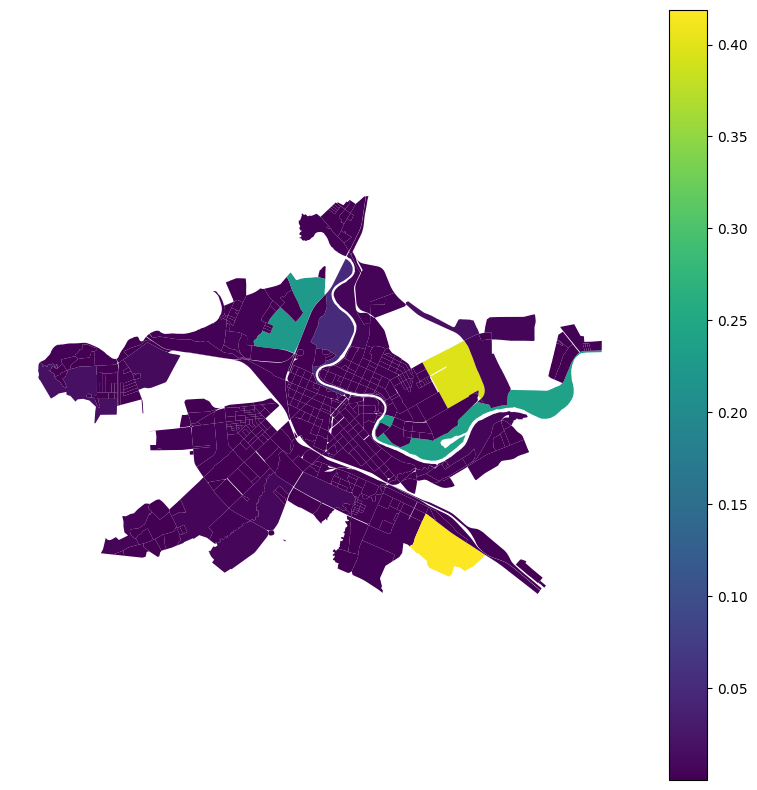

In [22]:
from blocksnet.machine_learning.classification import BlockCategory

blocks[['geometry']].join(res[res['category'] == BlockCategory.NORMAL]).plot(column='large', legend=True, figsize=(10,10)).set_axis_off()